# Teoría de grafos

A lo largo de este documento se recorrerá .... introducción

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.linalg as la
import networkx as nx
import pygraphviz as pgv
import scipy.integrate as sint
import matplotlib.pyplot as plt

ImportError: No module named pygraphviz

Menú

## Representación matricial de grafos

Existen diversas formas de representar los grafos, cuando tratamos de reprensetar de forma algoritmica lamás adecuada es la llamada **matriz de adyacencia**.

** definicion:** sea $\ G = (V, E) $  con $\ |V| = n $  y además $\ V = {v_1, v_2, v_3,...v_n} $ la **matriz de adyacencia** de $\ G $ respecto a los vértices anteriores, es una *matriz booleana* $\ n * n $, A, cuyo elemento $\ _i $, $\ _j $ vale $\ 1 $ cuando $\ v_i $ es adyacente a $\ v_j $ y $\ 0 $ cuando no lo es. Es decir, si $\ A = [a_i $ $\ _j] $ es la matriz de adyacencia, entonces:

\begin{equation*}
 a_i,_j = \begin{cases}
    1       & \quad \text{si } {v_i, v_j} \text{ es un lado de G}\\
    0  & \quad \text{en otro caso}\\
  \end{cases}
\end{equation*}


[[[[ Explicación sencilla de lo que es la matri de adyacencia ]]]]

In [3]:
Adj = np.array([[0, 1, 1, 0, 0, 0], 
                [1, 0, 1, 1, 1, 0], 
                [1, 1, 0, 0, 0, 0], 
                [0, 1, 0, 0, 0, 1], 
                [0, 1, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0]])

G = nx.from_numpy_matrix(Adj)
nx.draw_networkx(G, node_color='r', node_size=1000)

AttributeError: 'module' object has no attribute 'from_numpy_matrix'

las matrices de adyacencia pueden también emplearse para representar multigrafos con bucles. En tales casos, a matriz A no tiene por qué ser booleana.


los nodos autoreferenciados son: [1, 3]


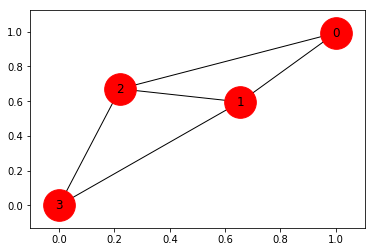

In [11]:
Adj1 = np.array([[0, 3, 1, 0], 
                [3, 1, 1, 1],
                [1, 1, 0, 2],
                [0, 1, 2, 1]
               ])

G1 = nx.from_numpy_matrix(Adj1)

nx.draw_networkx(G1, node_color='r', node_size=1000)
v = G1.nodes_with_selfloops()
print
print '{0}{1}'.format('los nodos autoreferenciados son: ', v)


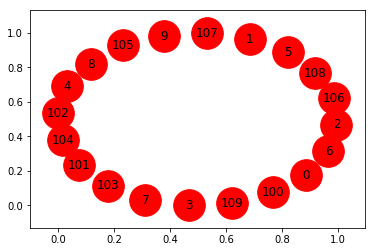

In [12]:
G3 = nx.MultiGraph()
G3.add_nodes_from([2,3])
G3.add_nodes_from(range(100,110))
H=nx.Graph()
H.add_path([0,1,2,3,4,5,6,7,8,9])
G3.add_nodes_from(H)

nx.draw_networkx(G3, node_color='r', node_size=1000)





In [4]:

G = nx.DiGraph()
G.add_edges_from([(0,1), (0,2), (1,1), (1,2)])
nx.draw_networkx(G, node_color='r', node_size=1000)
#nx.write_dot(G,'graph.dot')

AttributeError: 'module' object has no attribute 'DiGraph'